In [16]:
import pandas as pd
file = 'Bammel_Forest_Rain_Summary.csv'

In [27]:
data = pd.read_csv(file, encoding="ISO-8859-1",index_col=0)

In [28]:
data.head()

,Rain
Date,
1/1/2000 0:00,1.64
2/1/2000 0:00,1.00
3/1/2000 0:00,0.96
4/1/2000 0:00,3.64
5/1/2000 0:00,7.16


In [47]:
data.index = pd.to_datetime(data.index)
data.columns = ['Rainfall']
data.head()

,Rainfall
Date,
2000-01-01,1.64
2000-02-01,1.00
2000-03-01,0.96
2000-04-01,3.64
2000-05-01,7.16


In [29]:
import matplotlib.pyplot as plt

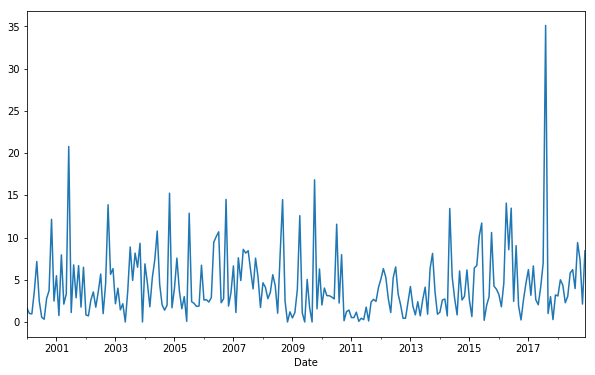

In [54]:
plt.figure(figsize=(10,6))
data['Rainfall'].plot();
# plt.ylabel('Rainfall')

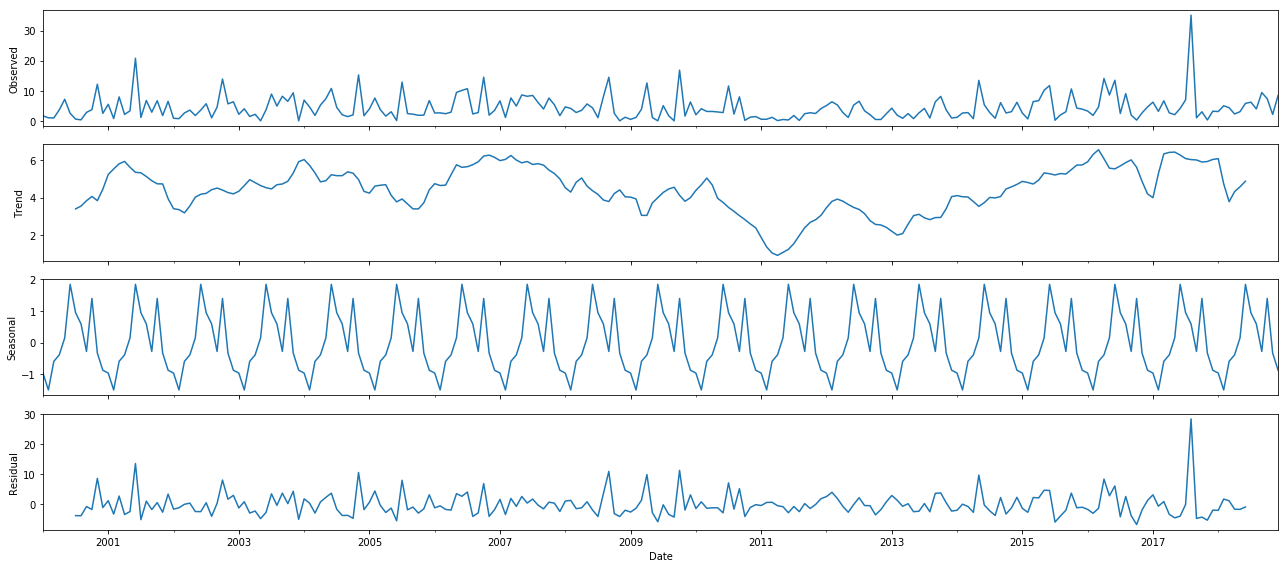

In [58]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(data['Rainfall'], model='additive')
fig = decomposition.plot()
plt.show()

In [61]:
import itertools
import statsmodels.api as sm


p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [64]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data['Rainfall'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning:

Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsan

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1464.5465858351786
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1344.093005200177
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1365.1617633963124
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1180.2102276123871
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1320.252960339645


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1263.1593580327353
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1235.0261691065966


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1182.2097880603064
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1416.8391753027734
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1320.0787932354608


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1361.5064624224992


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1177.2096433763581
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1318.1126824628645


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1260.144735612472
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1236.672117684909


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1179.2092618568167
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1438.5463128221713
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1368.597952043051
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1515.543604400487


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1310.218171644835
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1374.8694353929861
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1366.7341789293823
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1378.0034044243894


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1312.2181043418873
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1289.9931662114527


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1224.8254397927005
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1360.3361875243972


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1175.876328827942
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1236.9757840509242


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1224.2508924652682


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1237.2718940130035


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1177.872794779988
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1387.7452039776963
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1311.4697954791054
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1366.863543327314


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1182.1186379970347
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1308.989037349928


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1265.1520096242186
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:1231.372636219517


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1184.1182370799656
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1297.3023791714866


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1233.6991646666775
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1359.7855746820564


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1179.1481072968409


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1239.100293585185


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1233.059912525211


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:1232.2198294860173


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1181.1476673686216
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1376.8621908102232
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1310.1396112295192
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1453.944020198121


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1259.7870843532846
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1310.2840781039874


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1310.7666606033224
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1315.9409254985944


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1261.7870863637722
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1291.9877736861358


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1226.8245119957091
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1362.089630093983


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1177.846668117533
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1233.0858364062076


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1226.2303249022066


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:1233.1272864683142


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1179.8417824282533


In [65]:
mod = sm.tsa.statespace.SARIMAX(data['Rainfall'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0376      0.075     -0.503      0.615      -0.184       0.109
ma.L1         -1.0000     48.978     -0.020      0.984     -96.996      94.996
ar.S.L12      -0.5115      0.045    -11.280      0.000      -0.600      -0.423
sigma2        24.6315   1207.302      0.020      0.984   -2341.636    2390.899


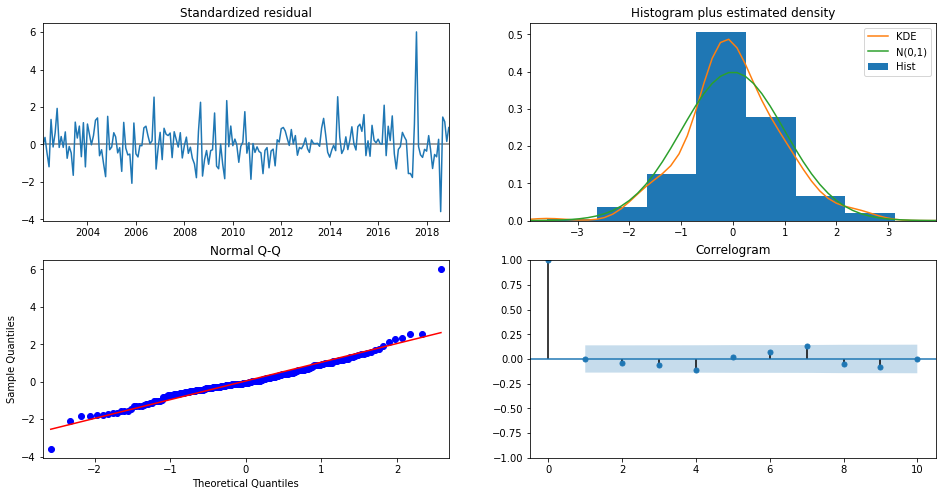

In [66]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

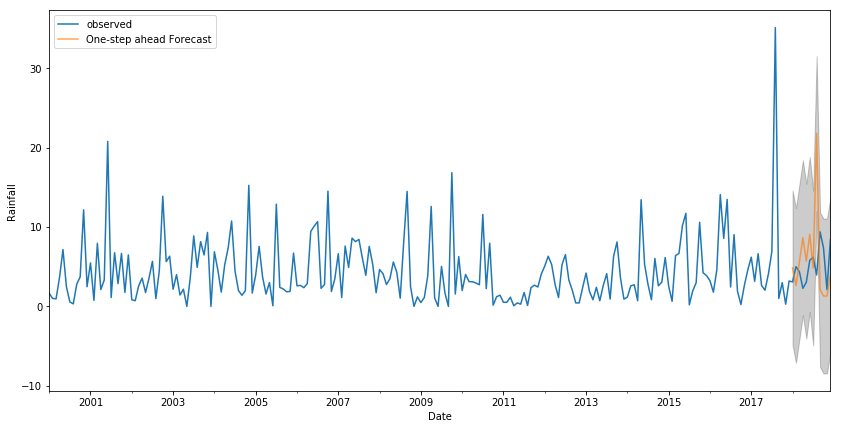

In [69]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = data['Rainfall']['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Rainfall')
plt.legend()

plt.show()

In [70]:
y_forecasted = pred.predicted_mean
y_truth = data['Rainfall']['2018-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 41.59


In [72]:
import numpy as np
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 6.45


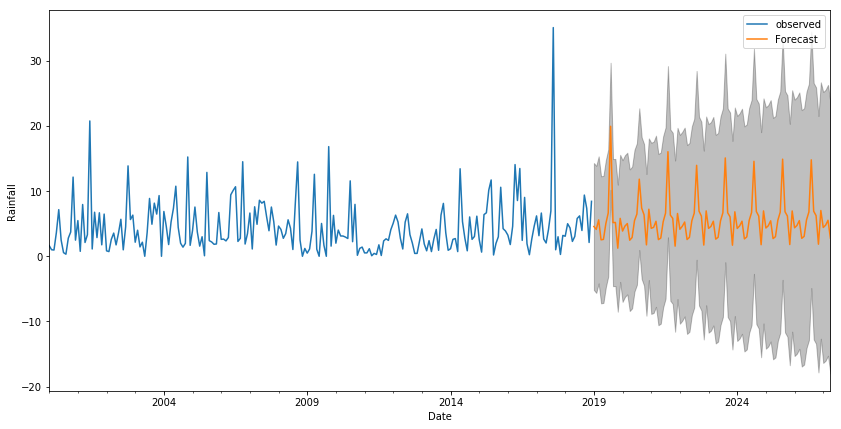

In [73]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = data['Rainfall'].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Rainfall')

plt.legend()
plt.show()